<a href="https://colab.research.google.com/github/codesongs/codestates_TP2/blob/main/%EB%B9%84%EA%B0%9C%EC%9D%B8%ED%99%94_%EC%84%B1%EB%8A%A5_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터를 사용하기 전에 contents에 movies.dat, ratings.dat, users.dat 파일 업로드 필요

In [ ]:
# 데이터 가져오기
import os
import pandas as pd


def load_ratings(path):
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies(path):
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding = 'ISO-8859-1' )
    return df

def load_users(path):
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

In [ ]:
df_ratings = load_ratings('/content')
df_movies = load_movies('/content')
df_users = load_users('/content')

In [ ]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
df_users

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
# 'movieId'와 'userId'를 기준으로 데이터프레임 통합
df_total = pd.merge(df_ratings, df_movies, on='movieId', how='left')
df_total = pd.merge(df_total, df_users, on='userId', how='left')

# 결과 확인
df_total

,userId,movieId,rating,timestamp,title,genres,gender,age,Occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


1. 베이스라인 코드로 구현한 추천시스템

In [ ]:
# df_total을 복사하여 data라는 데이터프레임 생성 (df_total을 변경하지 않는다.)
data = df_total.copy()
data


,userId,movieId,rating,timestamp,title,genres,gender,age,Occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [ ]:
# movie_stats라는 데이터프레임을 만들어 각 영화마다 평균 평점과 평점 개수를 계산한다.
# average_rating = 영화 당 평균 평점
# number_of_ratings = 평점 개수
movie_stats = data.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['average_rating', 'number_of_ratings']
print(movie_stats)

         average_rating  number_of_ratings
movieId                                   
1              4.146846               2077
2              3.201141                701
3              3.016736                478
4              2.729412                170
5              3.006757                296
...                 ...                ...
3948           3.635731                862
3949           4.115132                304
3950           3.666667                 54
3951           3.900000                 40
3952           3.780928                388

[3706 rows x 2 columns]


In [ ]:
# weighted average
# Choose an m value (this can be based on a percentile, e.g., a movie needs to have more ratings than at least 50% of the movies in the list)
m = movie_stats['number_of_ratings'].quantile(0.50)
C = data['rating'].mean()

# Calculate weighted rating for all qualified movies
movie_stats['weighted_rating'] = (movie_stats['number_of_ratings'] / (movie_stats['number_of_ratings'] + m) * data['rating']) + (m / (movie_stats['number_of_ratings'] + m) * C)

# Display movies sorted by weighted rating
top_movies = movie_stats.sort_values(by='weighted_rating', ascending=False)
print(top_movies)

         average_rating  number_of_ratings  weighted_rating
movieId                                                    
2028           4.337354               2653         4.936907
858            4.524966               2223         4.925345
457            4.103258               1995         4.917311
3578           4.106029               1924         4.914444
2987           3.679822               1799         4.908881
...                 ...                ...              ...
2699           3.002926               1367         1.213904
2797           3.855801               1491         1.197475
1721           3.583441               1546         1.190969
1270           3.990321               2583         1.117799
1210           4.022893               2883         1.106045

[3706 rows x 3 columns]


In [ ]:
# 영화당 평균 평점과 평점수에 기반한 추천 시스템 (비개인화 추천 시스템)
# 영화 당 평균 평점과 평점 수에 기반하여 rank라는 컬럼 생성
movie_stats['rank'] = movie_stats['average_rating'] + movie_stats['number_of_ratings']*0.1  # 여기서 0.1은 가중치를 의미한다.
top_movies = movie_stats.sort_values(by='rank', ascending=False)
#
top_movies


,average_rating,number_of_ratings,weighted_rating,rank
movieId,,,,
2858,4.317386,3428,3.985449,347.117386
260,4.453694,2991,3.983408,303.553694
1196,4.292977,2990,3.983402,303.292977
1210,4.022893,2883,1.106045,292.322893
480,3.763847,2672,3.981514,270.963847
...,...,...,...,...
3460,1.000000,1,3.576893,1.100000
133,1.000000,1,3.568861,1.100000
1430,1.000000,1,3.576893,1.100000


In [ ]:
# 가장 인기도 높은 영화 10개 출력 (영화당 평균평점과 평점 수을 기준으로 세운 시스템)
movie_titles = data[['movieId', 'title']].drop_duplicates()
top_movies_with_titles = top_movies.merge(movie_titles, on='movieId')
print(top_movies_with_titles['title'].head(10))


0                               American Beauty (1999)
1            Star Wars: Episode IV - A New Hope (1977)
2    Star Wars: Episode V - The Empire Strikes Back...
3    Star Wars: Episode VI - Return of the Jedi (1983)
4                                 Jurassic Park (1993)
5                           Saving Private Ryan (1998)
6                    Terminator 2: Judgment Day (1991)
7                                   Matrix, The (1999)
8                            Back to the Future (1985)
9                     Silence of the Lambs, The (1991)
Name: title, dtype: object


In [ ]:
# 영화당 평균평점과 평점 수을 기준으로 세운 추천 시스템에 대한 성능지표 (Recall, NCDG) 출력
# 데이터 훈련
import pandas as pd
import numpy as np

# 훈련 데이터 준비
data1 = data.copy()
data1

# 데이터를 훈련 데이터셋과 평가 데이터 셋으로 분할
train_data = data1.sample(frac=0.2, random_state=40)
test_data = data1.drop(train_data.index)

# 훈련된 데이터에 토대하여 인기도 높은 영화를 계산한다.
top_movies = train_data.groupby('movieId').size().sort_values(ascending=False).index.tolist()

# Define NDCG functions
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    return np.sum(r / np.log2(np.arange(2, r.size + 2)))

def ndcg_at_k(r, k):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k) / dcg_max

# 평가 데이터의 ndcg를 계산한다.
user_groups = test_data.groupby('userId')['movieId'].apply(list)
ndcgs = []

for user, movies in user_groups.iteritems():
    relevance_scores = [1 if movie in movies else 0 for movie in top_movies]
    ndcgs.append(ndcg_at_k(relevance_scores, len(movies)))

average_ndcg = np.mean(ndcgs)
print(f"Average NDCG: {average_ndcg:.4f}")

# 평가 데이터의 Recall을 계산한다.
N = 10  # Top-N recommendations
recalls = []

for user, movies in user_groups.iteritems():
    recommended_movies = top_movies[:N]
    hits = len(set(movies) & set(recommended_movies))
    recalls.append(hits / 20)

average_recall = np.mean(recalls)
print(f"Average Recall: {average_recall:.4f}")

<ipython-input-12-bf3c172ea69b>:32: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, movies in user_groups.iteritems():


Average NDCG: 0.2651
Average Recall: 0.1847


<ipython-input-12-bf3c172ea69b>:43: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, movies in user_groups.iteritems():


2. WR (Weighted rating)에 기반한 추천시스템

In [ ]:
# weighted_rating에 기반한 추천 시스템 (비개인화 추천 시스템)
# weighted rating에 기반하여 순위 출력
top_movies1 = movie_stats.sort_values(by='weighted_rating', ascending=False)
#
top_movies1

,average_rating,number_of_ratings,weighted_rating,rank
movieId,,,,
2028,4.337354,2653,4.936907,269.637354
858,4.524966,2223,4.925345,226.824966
457,4.103258,1995,4.917311,203.603258
3578,4.106029,1924,4.914444,196.506029
2987,3.679822,1799,4.908881,183.579822
...,...,...,...,...
2699,3.002926,1367,1.213904,139.702926
2797,3.855801,1491,1.197475,152.955801
1721,3.583441,1546,1.190969,158.183441


In [ ]:
# 가장 weighted rating이 높은 영화 20개 출력 (영화당 평균평점과 평점 수을 기준으로 세운 시스템)
movie_titles1 = data[['movieId', 'title']].drop_duplicates()
top_movies_with_titles1 = top_movies1.merge(movie_titles, on='movieId')
print(top_movies_with_titles1['title'].head(20))

0                 Saving Private Ryan (1998)
1                      Godfather, The (1972)
2                       Fugitive, The (1993)
3                           Gladiator (2000)
4            Who Framed Roger Rabbit? (1988)
5                         Stand by Me (1986)
6     One Flew Over the Cuckoo's Nest (1975)
7               2001: A Space Odyssey (1968)
8                          Abyss, The (1989)
9                                Jaws (1975)
10    Monty Python and the Holy Grail (1974)
11            When Harry Met Sally... (1989)
12                              X-Men (2000)
13                        Beetlejuice (1988)
14                Edward Scissorhands (1990)
15                             Batman (1989)
16       There's Something About Mary (1998)
17                           Clueless (1995)
18                           Rain Man (1988)
19                    Erin Brockovich (2000)
Name: title, dtype: object


In [ ]:
# weighted rating을 기준으로 세운 추천 시스템에 대한 성능지표 (Recall, NCDG) 출력
# 데이터 훈련
import pandas as pd
import numpy as np

# 훈련 데이터 준비
data2 = data.copy()
data2

# 데이터를 훈련 데이터셋과 평가 데이터 셋으로 분할
train_data = data2.sample(frac=0.2, random_state=40)
test_data = data2.drop(train_data.index)

# 훈련된 데이터에 토대하여 인기도 높은 영화를 계산한다.
top_movies1 = train_data.groupby('movieId').size().sort_values(ascending=False).index.tolist()

# Define NDCG functions
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    return np.sum(r / np.log2(np.arange(2, r.size + 2)))

def ndcg_at_k(r, k):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k) / dcg_max

# 평가 데이터의 ndcg를 계산한다.
user_groups = test_data.groupby('userId')['movieId'].apply(list)
ndcgs = []

for user, movies in user_groups.iteritems():
    relevance_scores = [1 if movie in movies else 0 for movie in top_movies1]
    ndcgs.append(ndcg_at_k(relevance_scores, len(movies)))

average_ndcg = np.mean(ndcgs)
print(f"Average NDCG: {average_ndcg:.4f}")

# 평가 데이터의 Recall을 계산한다.
N = 20  # Top-N recommendations
recalls = []

for user, movies in user_groups.iteritems():
    recommended_movies = top_movies1[:N]
    hits = len(set(movies) & set(recommended_movies))
    recalls.append(hits / 20)

average_recall = np.mean(recalls)
print(f"Average Recall: {average_recall:.4f}")

<ipython-input-15-b5b4ad527b22>:32: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, movies in user_groups.iteritems():


Average NDCG: 0.2651
Average Recall: 0.3457


<ipython-input-15-b5b4ad527b22>:43: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, movies in user_groups.iteritems():


3. weighted rating이 가장 높은 장르에 기반해 각 장르마다 각각 5개의 영화를 제안해주는 추천시스템

In [ ]:
# 3. weighted rating이 가장 높은 장르 5개가 각각 5개의 영화를 추천해주는 영화 추천시스템
# 데이터 원본 복사
# df_total을 복사하여 data3라는 데이터프레임 생성 (df_total을 변경하지 않는다.)
data3 = df_total.copy()
data3

,userId,movieId,rating,timestamp,title,genres,gender,age,Occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [ ]:
# data3 복사 (df1)
df1 = data3.copy()
# 데이터 필터링 (남자 35세~44세 까지의 데이터만 남긴다)
filtered_data = df1[(df1['age'] >= 35) & (df1['age'] <= 44) & (df1['gender'] == 'M')]
# 데이터 필터링 확인
print(filtered_data)

        userId  movieId  rating  timestamp                              title  \
523          7      648       4  978234737         Mission: Impossible (1996)   
524          7      861       4  978234874                    Supercop (1992)   
525          7     2916       5  978234842                Total Recall (1990)   
526          7     3578       3  978234737                   Gladiator (2000)   
527          7     3793       3  978234737                       X-Men (2000)   
...        ...      ...     ...        ...                                ...   
997885    6026     2010       3  956725904                  Metropolis (1926)   
997886    6026      541       5  956725858                Blade Runner (1982)   
997887    6026     1077       5  956725941                     Sleeper (1973)   
997888    6026     2021       1  956726304                        Dune (1984)   
997889    6026     1097       5  956725986  E.T. the Extra-Terrestrial (1982)   

                           

In [ ]:
# 3. weighted rating이 가장 높은 장르 5개가 각각 5개의 영화를 추천해주는 영화 추천시스템
import pandas as pd

# 각 영화마다 평점과 평점 개수를 계산한다.
movie_stats1 = filtered_data.groupby('movieId').agg({'rating': ['mean', 'count']}).reset_index()
movie_stats1.columns = ['movieId', 'mean_rating', 'count']

# C = 영화 당 평균 평점
C = movie_stats1['mean_rating'].mean()

# Minimum number of ratings required (m)
# M : 추천 시스템에 사용될 영화가 필요한 최소 평점 개수 지정
m = 50

# 각 영화당 weighted rating 계산
movie_stats1['weighted_rating'] = (movie_stats1['count'] / (movie_stats1['count'] + m) * movie_stats1['mean_rating']) + (m / (movie_stats1['count'] + m) * C)

# movies_stat1 데이터프레임과 이전에 추출했던 남자 35~44세의 데이터프레임을 합쳐 df_merged 라는 데이터프레임 생성
df_merged = filtered_data.merge(movie_stats1, on='movieId')

# 장르에 붙어 있던 " | " 제거
df_genres = df_merged.assign(genres=df_merged['genres'].str.split('|')).explode('genres')

# 각 장르마다 평균 weighted rating 계산
genre_weighted_avg = df_genres.groupby('genres')['weighted_rating'].mean().sort_values(ascending=False)

# 가장 높은 weighted rating 순서대로 장르 출력
top_5_genres = genre_weighted_avg.head(5).index.tolist()

# weighted_rating으로 분류된 df_unique_movies_sorted 라는 데이터프레임 생성 : 이걸 생성하지 않으면 추천 시스템에 똑같은 영화가 추천된다.
df_unique_movies_sorted = df_genres.drop_duplicates(subset='movieId').sort_values(by="weighted_rating", ascending=False)

# 이미 추천된 영화를 확인하기 위해 set을 만든다.
already_recommended = set()

# weighted rating이 가장 높은 5개의 장르에서 각각 다른 영화를 추천한다.
for genre in top_5_genres:
    # 장르에 추천 되지 않은 영화를 걸러낸다.
    genre_movies = df_unique_movies_sorted[(df_unique_movies_sorted['genres'] == genre) & (~df_unique_movies_sorted['movieId'].isin(already_recommended))].head(5)

    # Update the already_recommended set with the movieIds of the current top 5
    already_recommended.update(genre_movies['movieId'].tolist())

    print(f"\nTop 5 movies for the genre '{genre}' are:")
    print(genre_movies[['movieId', 'title', 'weighted_rating']])


Top 5 movies for the genre 'Film-Noir' are:
       movieId                                          title  weighted_rating
38595      541                            Blade Runner (1982)         4.195962
64940      913                     Maltese Falcon, The (1941)         4.164998
12781     1252                               Chinatown (1974)         4.133762
75254      922  Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         4.128517
15075     1267               Manchurian Candidate, The (1962)         4.031404

Top 5 movies for the genre 'War' are:
        movieId                                  title  weighted_rating
129923     1927  All Quiet on the Western Front (1930)         3.818872
121985     2670            Run Silent, Run Deep (1958)         3.589668
59938      3066               Tora! Tora! Tora! (1970)         3.466513
147776     2669                  Pork Chop Hill (1959)         3.337292
145374      665                     Underground (1995)         3.331808

Top 5 mov

In [ ]:
# 추천시스템의 성능지표 (ndcg, Recall) 출력

threshold_rating = 4.0
relevant_items_dict = {}

for user, group in df_merged[df_merged['rating'] > threshold_rating].groupby('userId'):
    relevant_items_dict[user] = group['movieId'].tolist()

recommended_items_list = []

for genre in top_5_genres:
    genre_movies = df_unique_movies_sorted[df_unique_movies_sorted['genres'] == genre].head(5)
    recommended_items_list.extend(genre_movies['movieId'].tolist())

# 35세~44세 사용자에게 추천하는 추천리스트)
recommended_items_dict = {user: recommended_items_list for user in df_merged['userId'].unique()}

from math import log2

def compute_recall(recommended_items, relevant_items):
    relevant_recommended_items = set(recommended_items).intersection(relevant_items)
    if not relevant_items:
        return 0.0
    return len(relevant_recommended_items) / len(relevant_items)

def compute_ndcg(recommended_items, relevant_items):
    dcg = 0.0
    idcg = 0.0
    for i, rec_item in enumerate(recommended_items[:len(relevant_items)]):  # Ensure you don't go beyond the number of relevant items
        if rec_item in relevant_items:
            dcg += 1 / log2(i + 2)  # We use i+2 to start the log count from 2 as log(1) is 0
    for i in range(len(relevant_items)):
        idcg += 1 / log2(i + 2)
    if idcg == 0:
        return 0.0
    return dcg / idcg

recall_values = []
ndcg_values = []

for user_id, relevant_items in relevant_items_dict.items():
    recommended_items = recommended_items_dict.get(user_id, [])
    recall_values.append(compute_recall(recommended_items, relevant_items))
    ndcg_values.append(compute_ndcg(recommended_items, relevant_items))

average_recall = sum(recall_values) / len(recall_values) if recall_values else 0
average_ndcg = sum(ndcg_values) / len(ndcg_values) if ndcg_values else 0

print(f"Average Recall: {average_recall:.4f}")
print(f"Average NDCG: {average_ndcg:.4f}")

Average Recall: 0.0895
Average NDCG: 0.0759


4. 35세부터 44세의 남성 사용자 (특정 유저)의 WR (Weighted Rating)에 기반한 영화 추천시스템

> 들여쓴 블록



In [ ]:
# 3에서 필터링 했던 filtered_data 라는 데이터프레임을 복사하여 df2라는 데이터프레임 생성
df2 = filtered_data.copy()
df2

,userId,movieId,rating,timestamp,title,genres,gender,age,Occupation,zip_code
523,7,648,4,978234737,Mission: Impossible (1996),Action|Adventure|Mystery,M,35,1,06810
524,7,861,4,978234874,Supercop (1992),Action|Thriller,M,35,1,06810
525,7,2916,5,978234842,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller,M,35,1,06810
526,7,3578,3,978234737,Gladiator (2000),Action|Drama,M,35,1,06810
527,7,3793,3,978234737,X-Men (2000),Action|Sci-Fi,M,35,1,06810
...,...,...,...,...,...,...,...,...,...,...
997885,6026,2010,3,956725904,Metropolis (1926),Sci-Fi,M,35,6,11210
997886,6026,541,5,956725858,Blade Runner (1982),Film-Noir|Sci-Fi,M,35,6,11210
997887,6026,1077,5,956725941,Sleeper (1973),Comedy|Sci-Fi,M,35,6,11210
997888,6026,2021,1,956726304,Dune (1984),Fantasy|Sci-Fi,M,35,6,11210


In [ ]:
# movie_stats1라는 데이터프레임을 만들어 각 영화마다 평균 평점과 평점 개수를 계산한다.
# average_rating = 영화 당 평균 평점
# number_of_ratings = 평점 개수
movie_stats1 = df2.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats1.columns = ['average_rating', 'number_of_ratings']
print(movie_stats1)

         average_rating  number_of_ratings
movieId                                   
1              4.333333                294
2              3.271845                103
3              2.894737                 57
4              2.666667                 18
5              2.973684                 38
...                 ...                ...
3948           3.653465                101
3949           4.400000                 30
3950           4.000000                  5
3951           4.142857                  7
3952           3.781818                 55

[3383 rows x 2 columns]


In [ ]:
# weighted average
# Choose an m value (this can be based on a percentile, e.g., a movie needs to have more ratings than at least 50% of the movies in the list)
m = movie_stats1['number_of_ratings'].quantile(0.50)
C = df2['rating'].mean()

# Calculate weighted rating for all qualified movies
movie_stats1['weighted_rating'] = (movie_stats1['number_of_ratings'] / (movie_stats1['number_of_ratings'] + m) * df2['rating']) + (m / (movie_stats1['number_of_ratings'] + m) * C)

# Display movies sorted by weighted rating
top_movies = movie_stats1.sort_values(by='weighted_rating', ascending=False)
print(top_movies)

         average_rating  number_of_ratings  weighted_rating
movieId                                                    
2987           3.674074                270         4.899289
529            4.010204                 98         4.753724
3006           4.126316                 95         4.747354
3105           3.658824                 85         4.723520
2989           3.564706                 85         4.723520
...                 ...                ...              ...
3939           2.250000                  4              NaN
3940           2.000000                  4              NaN
3941           2.333333                  6              NaN
3942           2.600000                  5              NaN
3943           3.090909                 11              NaN

[3383 rows x 3 columns]


In [ ]:
# weighted_rating에 기반한 추천 시스템 (비개인화 추천 시스템)
# weighted rating에 기반하여 순위 출력
top_movies2 = movie_stats1.sort_values(by='weighted_rating', ascending=False)
#
top_movies2

,average_rating,number_of_ratings,weighted_rating
movieId,,,
2987,3.674074,270,4.899289
529,4.010204,98,4.753724
3006,4.126316,95,4.747354
3105,3.658824,85,4.723520
2989,3.564706,85,4.723520
...,...,...,...
3939,2.250000,4,NaN
3940,2.000000,4,NaN
3941,2.333333,6,NaN


In [ ]:
# 가장 weighted rating이 높은 영화 20개 출력 (영화당 평균평점과 평점 수을 기준으로 세운 시스템)
movie_titles2 = df2[['movieId', 'title']].drop_duplicates()
top_movies_with_titles2 = top_movies2.merge(movie_titles, on='movieId')
print(top_movies_with_titles2['title'].head(20))

0                      Who Framed Roger Rabbit? (1988)
1                   Searching for Bobby Fischer (1993)
2                                  Insider, The (1999)
3                                    Awakenings (1990)
4                            For Your Eyes Only (1981)
5                           Bone Collector, The (1999)
6                              Yellow Submarine (1968)
7                                   End of Days (1999)
8                                    Flashdance (1983)
9                         Three Musketeers, The (1993)
10                             Drugstore Cowboy (1989)
11                             Jeremiah Johnson (1972)
12                                        Tommy (1975)
13    All About My Mother (Todo Sobre Mi Madre) (1999)
14                             Blue Lagoon, The (1980)
15                                   Serial Mom (1994)
16                                   Nighthawks (1981)
17                               Quest for Fire (1981)
18        

In [ ]:
# weighted rating을 기준으로 세운 추천 시스템에 대한 성능지표 (Recall, NCDG) 출력
# 데이터 훈련
import pandas as pd
import numpy as np

# 훈련 데이터 준비
# 데이터를 훈련 데이터셋과 평가 데이터 셋으로 분할
train_data1 = df2.sample(frac=0.2, random_state=40)
test_data1 = df2.drop(train_data1.index)

# 훈련된 데이터에 토대하여 인기도 높은 영화를 계산한다.
top_movies2 = train_data1.groupby('movieId').size().sort_values(ascending=False).index.tolist()

# Define NDCG functions
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    return np.sum(r / np.log2(np.arange(2, r.size + 2)))

def ndcg_at_k(r, k):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k) / dcg_max

# 평가 데이터의 ndcg를 계산한다.
user_groups = test_data1.groupby('userId')['movieId'].apply(list)
ndcgs = []

for user, movies in user_groups.iteritems():
    relevance_scores = [1 if movie in movies else 0 for movie in top_movies1]
    ndcgs.append(ndcg_at_k(relevance_scores, len(movies)))

average_ndcg = np.mean(ndcgs)
print(f"Average NDCG: {average_ndcg:.4f}")

# 평가 데이터의 Recall을 계산한다.
N = 20  # Top-N recommendations
recalls = []

for user, movies in user_groups.iteritems():
    recommended_movies = top_movies1[:N]
    hits = len(set(movies) & set(recommended_movies))
    recalls.append(hits / 20)

average_recall = np.mean(recalls)
print(f"Average Recall: {average_recall:.4f}")

<ipython-input-25-f48d0bdb805a>:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, movies in user_groups.iteritems():


Average NDCG: 0.2732
Average Recall: 0.3490


<ipython-input-25-f48d0bdb805a>:40: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for user, movies in user_groups.iteritems():


# 4번의 예시 (UserId가 56인 경우)

In [ ]:
# 3에서 필터링 했던 filtered_data 라는 데이터프레임을 복사하여 df2라는 데이터프레임 생성
df3 = filtered_data.copy()
df3

,userId,movieId,rating,timestamp,title,genres,gender,age,Occupation,zip_code
523,7,648,4,978234737,Mission: Impossible (1996),Action|Adventure|Mystery,M,35,1,06810
524,7,861,4,978234874,Supercop (1992),Action|Thriller,M,35,1,06810
525,7,2916,5,978234842,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller,M,35,1,06810
526,7,3578,3,978234737,Gladiator (2000),Action|Drama,M,35,1,06810
527,7,3793,3,978234737,X-Men (2000),Action|Sci-Fi,M,35,1,06810
...,...,...,...,...,...,...,...,...,...,...
997885,6026,2010,3,956725904,Metropolis (1926),Sci-Fi,M,35,6,11210
997886,6026,541,5,956725858,Blade Runner (1982),Film-Noir|Sci-Fi,M,35,6,11210
997887,6026,1077,5,956725941,Sleeper (1973),Comedy|Sci-Fi,M,35,6,11210
997888,6026,2021,1,956726304,Dune (1984),Fantasy|Sci-Fi,M,35,6,11210


In [ ]:
import pandas as pd

# 각 영화당 총 평점 개수와 총 평점을 계산한다.
rating_sum = filtered_data.groupby('movieId')['rating'].sum()
rating_count = filtered_data.groupby('movieId')['rating'].count()

# 각 영화당 WR (Weighted average) = 총 평점 / 총 평점 개수 를 구한다.
weighted_average_rating = rating_sum / rating_count

# 계산된 WR을 데이터프레임 원본 (df3)과 합친다.
result = filtered_data.merge(weighted_average_rating.reset_index(), on='movieId', suffixes=('', '_weighted_avg'))

# Step 5: Print the result
print(result)

        userId  movieId  rating  timestamp  \
0            7      648       4  978234737   
1           23      648       4  978460739   
2           65      648       5  977888402   
3          100      648       2  977594265   
4          118      648       3  977501360   
...        ...      ...     ...        ...   
149525    5691     2821       2  958599558   
149526    5699     2305       3  958588061   
149527    5977     3288       3  957028583   
149528    5978     3472       1  956958714   
149529    6007     2292       2  956789825   

                                                    title  \
0                              Mission: Impossible (1996)   
1                              Mission: Impossible (1996)   
2                              Mission: Impossible (1996)   
3                              Mission: Impossible (1996)   
4                              Mission: Impossible (1996)   
...                                                   ...   
149525              

In [ ]:
# 유저 '56'이 보았던 영화 출력
specific_user_data = result[result['userId'] == 56]

# Get the list of movies watched by the user with necessary columns
user_movies = specific_user_data[['movieId', 'title', 'genres', 'rating_weighted_avg']]

# Sort the list of movies by weighted rating in descending order
user_movies_sorted1 = user_movies.sort_values(by='rating_weighted_avg', ascending=False)

# Get top 20 movies from the sorted list
user_movies_top_20 = user_movies_sorted1.head(20)

# Print the list of top 20 movies
print(user_movies_top_20)

       movieId                             title  \
47648      318  Shawshank Redemption, The (1994)   
57352      527           Schindler's List (1993)   
6338      2028        Saving Private Ryan (1998)   
8760      2762           Sixth Sense, The (1999)   
54658     3114                Toy Story 2 (1999)   
32018       50        Usual Suspects, The (1995)   
16352      593  Silence of the Lambs, The (1991)   
13965        1                  Toy Story (1995)   
2989      2571                Matrix, The (1999)   
9913      2858            American Beauty (1999)   
10467      608                      Fargo (1996)   
56065      150                  Apollo 13 (1995)   
56646      246                Hoop Dreams (1994)   
9498       296               Pulp Fiction (1994)   
5702       110                 Braveheart (1995)   
37294     1213                 GoodFellas (1990)   
31390     1617          L.A. Confidential (1997)   
7647      2997       Being John Malkovich (1999)   
54271     13

In [ ]:
# 사용자 '56'의 평점을 가져온다.
user_56_ratings = df2[df2['userId'] == 56]

# 유사한 영화를 찾는다. (유저"56"가 평점을 매기지 않은 영화 중에서 찾는다)
movies_to_consider = df2[~df2['movieId'].isin(user_56_ratings['movieId'])]

# WR (Weighted Rating)을 사용해서 유저에게 추천할 영화를 찾는다.
# movies_to_consider 데이터셋에 속해 있는 모든 영화의 WR (Weighted Rating)을 계산한다.
movie_stats = movies_to_consider.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['average_rating', 'number_of_ratings']

m = movie_stats['number_of_ratings'].quantile(0.50)
C = movies_to_consider['rating'].mean()

movie_stats['weighted_rating'] = (movie_stats['number_of_ratings'] / (movie_stats['number_of_ratings'] + m) * movie_stats['average_rating']) + (m / (movie_stats['number_of_ratings'] + m) * C)

# WR(Weighted Rating)에 기반해서 상위 영화 20개를 추천한다.
top_movies = movie_stats.sort_values(by='weighted_rating', ascending=False).head(20)

# 상위 영화 20개의 이름을 가져온다
movie_titles = df2[['movieId', 'title']].drop_duplicates()
top_movies_with_titles = top_movies.merge(movie_titles, on='movieId')

# 이전에 가져온 상위 영화 20개의 이름을 출력한다.
print(top_movies_with_titles['title'])

0                                 Godfather, The (1972)
1                          To Kill a Mockingbird (1962)
2     Dr. Strangelove or: How I Learned to Stop Worr...
3                                     Casablanca (1942)
4                        Raiders of the Lost Ark (1981)
5     Seven Samurai (The Magnificent Seven) (Shichin...
6         Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
7                                    Rear Window (1954)
8                          It's a Wonderful Life (1946)
9                        Godfather: Part II, The (1974)
10            Star Wars: Episode IV - A New Hope (1977)
11               One Flew Over the Cuckoo's Nest (1975)
12                          Boat, The (Das Boot) (1981)
13                             Wizard of Oz, The (1939)
14                                Third Man, The (1949)
15                           Wrong Trousers, The (1993)
16                            Lawrence of Arabia (1962)
17                            North by Northwest

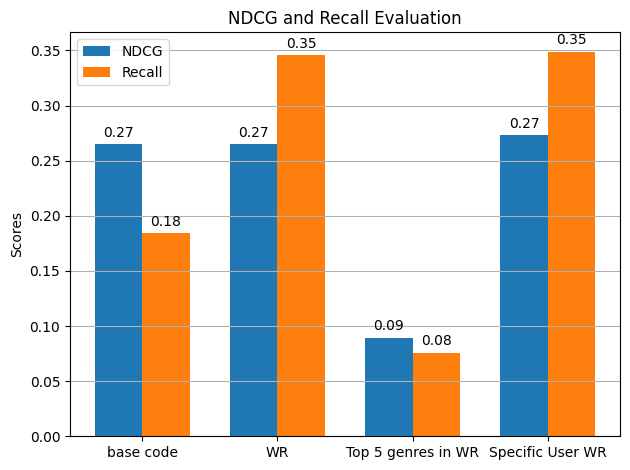

In [ ]:
# 추천시스템 성능 평가 그래프
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are your NDCG and Recall values for 4 different sets
# 각 모델의 그래프 항목의 이름, NDCG, Recall을 입력한다
sets = ['base code', 'WR', 'Top 5 genres in WR', 'Specific User WR']
ndcg_values = [0.2651, 0.2651, 0.0895, 0.2732]
recall_values = [0.1847, 0.3457, 0.0759, 0.3490]

x = np.arange(len(sets))  # the label locations

# 바의 가로길이 설정
width = 0.35

fig, ax = plt.subplots()

# 데이터를 그린다
rects1 = ax.bar(x - width/2, ndcg_values, width, label='NDCG')
rects2 = ax.bar(x + width/2, recall_values, width, label='Recall')
.
# 레이블, 이름, x축 그래프에 글자를 추가한다.
ax.set_ylabel('Scores')
ax.set_title('NDCG and Recall Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(sets)
ax.legend()

# y축에 그리드를 추가한다.
ax.grid(True, axis='y')

# 바 위의 값이 몇인지 자동으로 적어주는 함수
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()